In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [3]:
!wget https://www.dropbox.com/s/ubfq7p14svpt6ni/candy_production.csv

--2021-06-16 14:51:01--  https://www.dropbox.com/s/ubfq7p14svpt6ni/candy_production.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ubfq7p14svpt6ni/candy_production.csv [following]
--2021-06-16 14:51:01--  https://www.dropbox.com/s/raw/ubfq7p14svpt6ni/candy_production.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb390b70e9f11b9384a810edc9f.dl.dropboxusercontent.com/cd/0/inline/BQgHjtl9Lj7xCR2Tgx3VjlAX0ZW5O52qk_p5sBvVnZCmdF4rcb-iCNEMdgakY4-in7oek0sF4zwNMf6BFkIupZ_-vh8z_T3dPcNIB2LcSPYdldFHFqoNzg1_DTfBCvR1VLWAKMN8Esl7vDlTHPQkMzYe/file# [following]
--2021-06-16 14:51:01--  https://ucb390b70e9f11b9384a810edc9f.dl.dropboxusercontent.com/cd/0/inline/BQgHjtl9Lj7xCR2Tgx3VjlAX0ZW5O52qk_p5sBvVnZCmdF4rcb-iCNEMdgakY4-in7

Данные по производству конфет в США в период с 1972 года по 2016. Взяты с платформы Kaggle (https://www.kaggle.com/rtatman/us-candy-production-by-month)

In [4]:
df = pd.read_csv("candy_production.csv")

In [5]:
df

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
...,...,...
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861


In [6]:
df.columns = ["month", "candy"]
df.head()

,month,candy
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [7]:
df = df.drop(df.index[df['candy'] == ' n=547'])

In [8]:
df['candy'].unique()

array([ 85.6945,  71.82  ,  66.0229,  64.5645,  65.01  ,  67.6467,
        69.0429,  70.837 ,  75.0462, 106.9289, 105.5962, 105.9673,
        91.2997,  77.27  ,  69.611 ,  70.2986,  71.6822,  74.8635,
        72.0464,  73.1748,  80.5915, 102.92  , 109.2524, 105.221 ,
        88.6985,  83.6098,  77.23  ,  67.3209,  74.6196,  79.5858,
        66.0568,  71.1864,  70.175 ,  99.2212, 101.1201,  86.893 ,
        67.0117,  52.6964,  50.6689,  59.7613,  60.8277,  63.3629,
        62.3089,  66.9021,  66.32  ,  96.3411, 105.6285, 102.1819,
        87.9578,  75.1878,  62.0101,  64.4758,  70.5454,  68.2086,
        69.3122,  71.5922,  76.9073, 107.9049, 111.6584, 113.9655,
        97.3515,  90.0083,  77.2871,  76.0459,  77.9316,  78.3077,
        75.8701,  78.1822,  84.2727, 109.2254, 106.1656, 113.0575,
        90.1141,  80.4678,  76.464 ,  77.4211,  76.7081,  78.1769,
        72.4653,  75.9054,  82.732 , 105.0435, 111.6915, 114.0821,
        98.6382,  84.7727,  81.0653,  77.1607,  78.378 ,  81.0

In [9]:
df['candy'] = df['candy'].astype(np.int32)

In [10]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.dtypes

month    datetime64[ns]
candy             int32
dtype: object

# Графики рядов

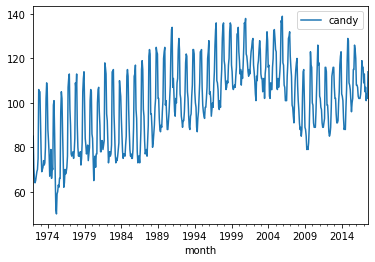

In [11]:
df.plot.line(x = 'month', y = 'candy')
plt.show()

Можем заметить сезонность: в определенную часть года производство конфет в США растет, затем падает. Это наблюдается в течение всего временного ряда

In [12]:
c = df[['candy']]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


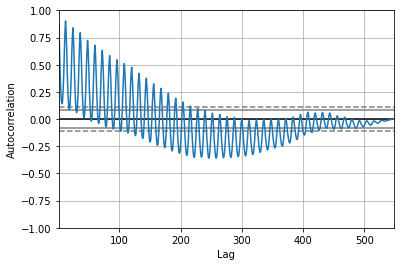

In [13]:
pd.plotting.autocorrelation_plot(df['candy'])
plt.show()

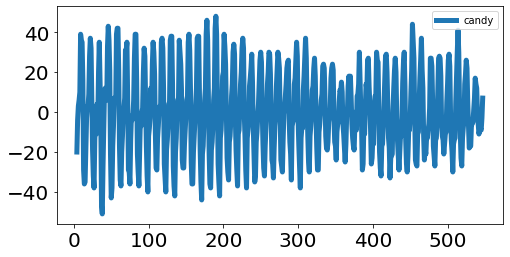

In [14]:
c.diff(periods=4).plot(figsize=(8,4), linewidth=5, fontsize=20)
plt.show()

Ряды являются сезонными, тренд также наблюдается, со временем амплитуда колебаний не растет (наоборот, скорее снижается или становится более волатильной, но тренда на рост точно нет)

# Анализ предсказаний

In [15]:
test_size = 12*2 #2 последних года

train_df = df[:-test_size]
test_df = df[-test_size:]

In [16]:
trains_ts = pd.Series(data=train_df['candy'].values, index = train_df['month'].values)
tests_ts = pd.Series(data=test_df['candy'].values, index = test_df['month'].values)

In [17]:
tests_ts.head()

2015-09-01    115
2015-10-01    126
2015-11-01    124
2015-12-01    120
2016-01-01    108
dtype: int32

In [18]:
trains_ts

1972-01-01     85
1972-02-01     71
1972-03-01     66
1972-04-01     64
1972-05-01     65
             ... 
2015-04-01    101
2015-05-01     96
2015-06-01    100
2015-07-01    102
2015-08-01    115
Length: 524, dtype: int32

In [19]:
trains_ts.index = pd.date_range("1972-01-01", periods=524, freq="M")

In [20]:
tests_ts.index = pd.date_range("2015-09-01", periods=24, freq="M")

In [21]:
trains_ts.index

DatetimeIndex(['1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30', '1972-07-31', '1972-08-31',
               '1972-09-30', '1972-10-31',
               ...
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31'],
              dtype='datetime64[ns]', length=524, freq='M')

In [22]:
!pip install sktime

In [23]:
from sklearn.metrics import mean_absolute_error
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

In [24]:
fh = ForecastingHorizon(tests_ts.index, is_relative=False)
fh

ForecastingHorizon(['2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31'],
              dtype='datetime64[ns]', freq='M', is_relative=False)

In [25]:
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import (
    MeanAbsolutePercentageError,
    mean_absolute_percentage_error,
)

7.75

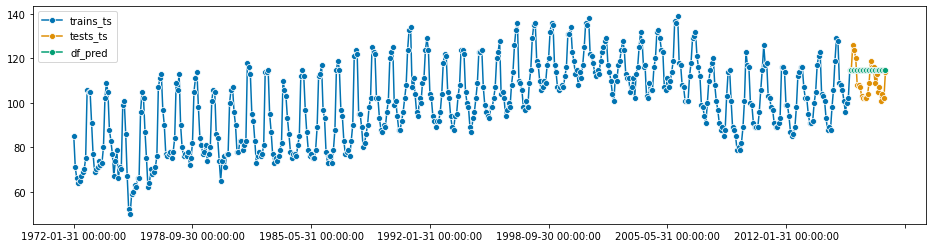

In [26]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(trains_ts)
df_pred = forecaster.predict(fh)
plot_series(trains_ts, tests_ts, df_pred, labels=["trains_ts", "tests_ts", "df_pred"])
mean_absolute_error(df_pred, tests_ts)

4.25

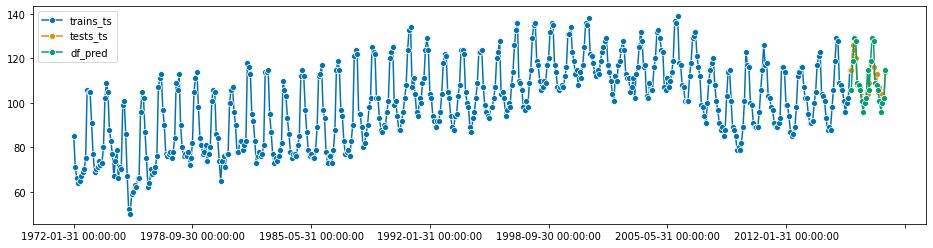

In [27]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(trains_ts)
df_pred = forecaster.predict(fh)
plot_series(trains_ts, tests_ts, df_pred, labels=["trains_ts", "tests_ts", "df_pred"])
mean_absolute_error(df_pred, tests_ts)

In [28]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

In [29]:
!pip install sktime[all_extras]

In [30]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

6.215767476831466

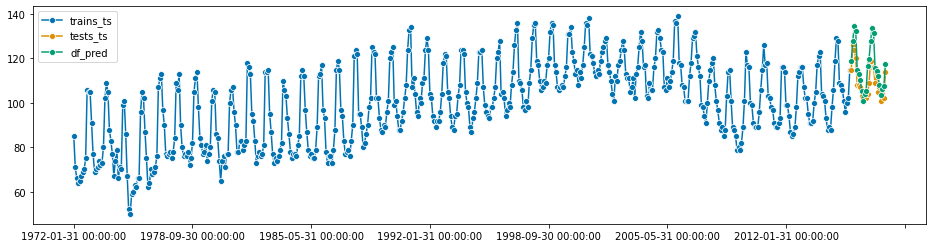

In [31]:
forecaster = ARIMA(
    order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True
)
forecaster.fit(trains_ts)
df_pred = forecaster.predict(fh)
plot_series(trains_ts, tests_ts, df_pred, labels=["trains_ts", "tests_ts", "df_pred"])
mean_absolute_error(df_pred, tests_ts)

5.32410474098225

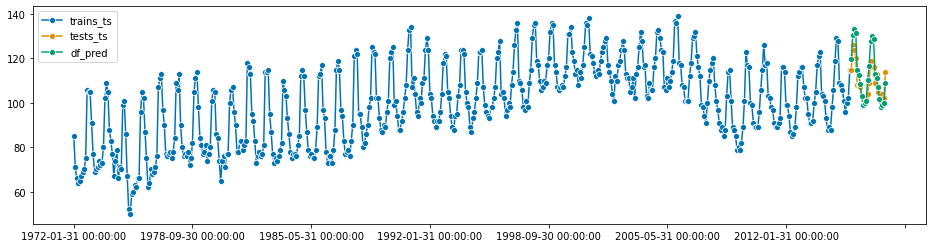

In [32]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(trains_ts)
df_pred = forecaster.predict(fh)
plot_series(trains_ts, tests_ts, df_pred, labels=["trains_ts", "tests_ts", "df_pred"])
mean_absolute_error(df_pred, tests_ts)

In [33]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [34]:
train_ets = trains_ts.copy()
train_ets.index = pd.PeriodIndex(train_ets.index)

In [35]:
test_ets = tests_ts.copy()
test_ets.index = pd.PeriodIndex(test_ets.index)

In [36]:
fh_ets = ForecastingHorizon(test_ets.index, is_relative=False)
fh_ets

ForecastingHorizon(['2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
             '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
             '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08'],
            dtype='period[M]', freq='M', is_relative=False)

6.66445343748149

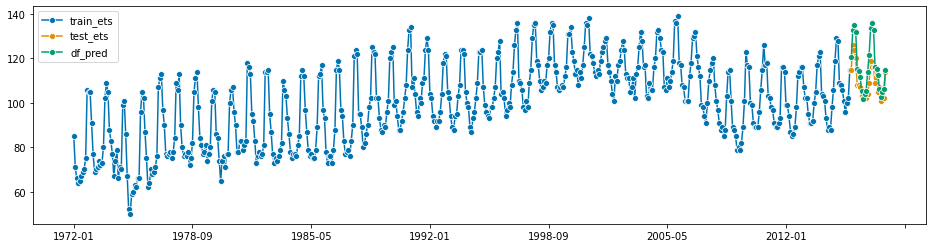

In [37]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(train_ets)
df_pred = forecaster.predict(fh_ets)
plot_series(train_ets, test_ets, df_pred, labels=["train_ets", "test_ets", "df_pred"])
mean_absolute_error(df_pred, test_ets)

6.0582949513251885

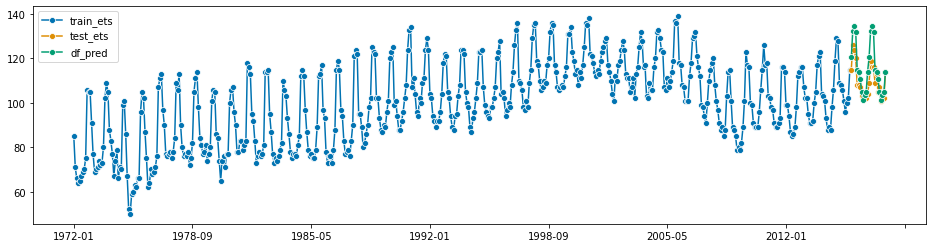

In [38]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(train_ets.astype(np.float64))
df_pred = forecaster.predict(fh_ets)
plot_series(train_ets, test_ets, df_pred, labels=["train_ets", "test_ets", "df_pred"])
mean_absolute_error(df_pred, test_ets)

## Сравнение ошибок

За тестовую выборку я взяла последние 2 года, поскольку временной ряд очень большой, и предыдущих лет было достаточно для обучения модели....

Согласно MAE, меньший уровень ошибок был у модели сезонной наивной (4.25), следующим идет AutoARIMA (5.32), затем AutoETS (6.05), ARIMA (6.21), ETS (AAA)(6.66) и последним наивное предсказание с MAE уровня 7.75

In [40]:
ts_df = df

In [41]:
ts = pd.Series(data=ts_df['candy'].values, index = ts_df['month'].values)

In [42]:
ts.index = pd.date_range("1972-01-01", periods=548, freq="M")

In [43]:
ts.index

DatetimeIndex(['1972-01-31', '1972-02-29', '1972-03-31', '1972-04-30',
               '1972-05-31', '1972-06-30', '1972-07-31', '1972-08-31',
               '1972-09-30', '1972-10-31',
               ...
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31'],
              dtype='datetime64[ns]', length=548, freq='M')

In [44]:
forecaster2 = NaiveForecaster(strategy="last", sp=12)
forecaster2.fit(ts)
df_pred2 = forecaster2.predict(np.arange(12)+1)

In [45]:
df_pred2

2017-09-30    109
2017-10-31    119
2017-11-30    116
2017-12-31    116
2018-01-31    109
2018-02-28    113
2018-03-31    105
2018-04-30    107
2018-05-31    101
2018-06-30    104
2018-07-31    102
2018-08-31    114
dtype: int32

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

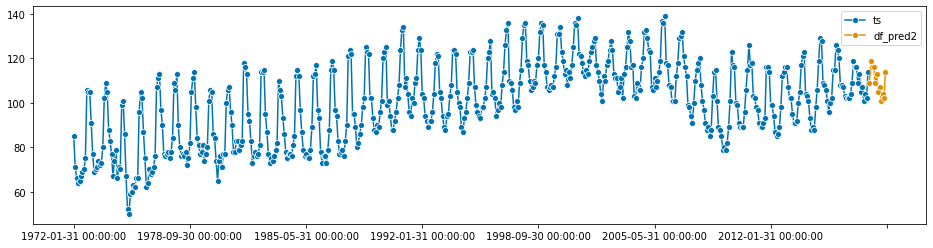

In [46]:
plot_series(ts, df_pred2, labels=["ts", "df_pred2"])

# RLMS

In [1]:
!wget https://www.dropbox.com/s/j3yzsk23gggjgbl/USER_RLMS-HSE_HH_1994_2019_v3.sav

--2021-06-16 15:05:55--  https://www.dropbox.com/s/j3yzsk23gggjgbl/USER_RLMS-HSE_HH_1994_2019_v3.sav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/j3yzsk23gggjgbl/USER_RLMS-HSE_HH_1994_2019_v3.sav [following]
--2021-06-16 15:05:56--  https://www.dropbox.com/s/raw/j3yzsk23gggjgbl/USER_RLMS-HSE_HH_1994_2019_v3.sav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf6b9efa7962e3513ed11274053.dl.dropboxusercontent.com/cd/0/inline/BQhKUY9y6CdXWaSRGuH8lHQuTpFuPor-rL5ySSTdCc2r3F4Et4LK1SGDndnnwUArdMmOFXOoDeAZZKWt-8Z3q84A06knteuiqHG2XyIVWaqWQDQnX61isVODEsbjmb-q3RXc819q7NJ553EHOMgF0lyt/file# [following]
--2021-06-16 15:05:56--  https://ucf6b9efa7962e3513ed11274053.dl.dropboxusercontent.com/cd/0/inline/BQhKUY9y6CdXWaSRGuH8lHQuTpF

In [2]:
!pip install pyreadstat

In [5]:
df2 = pd.read_spss("USER_RLMS-HSE_HH_1994_2019_v3.sav.1")

In [6]:
df2.head()

,ID_W,REDID_H,ID_H,AID_H,BID_H,CID_H,DID_H,EID_H,FID_H,GID_H,HID_H,IID_H,JID_H,KID_H,LID_H,MID_H,NID_H,OID_H,PID_H,QID_H,RID_H,SID_H,TID_H,UID_H,VID_H,WID_H,XID_H,ORIGSAM,HHWGT,PSU,STATUS,POPUL,SITE,REGION,A3,A3.3,A4.1,A4.2,A5.1,A5.2,...,H6911.1,H6921.1,H6911.2,H6921.2,H6911.3,H6921.3,H6911.4,H6921.4,H6911.6,H6921.6,H691.2,H6912.1,H6922.1,H6912.2,H6922.2,H6912.3,H6922.3,H6912.4,H6922.4,H6912.6,H6922.6,H691.3,H6913.1,H6923.1,H6913.2,H6923.2,H6913.3,H6923.3,H6913.4,H6923.4,H6913.6,H6923.6,G1.1,G1.2,G2,G3,G4,G5,G6,G7
0,1994 год,1.0,1001.0,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Да, адрес репрезентативной выборки",1.04676,Волосовский р-н: Ленинградская область,ПГТ,10800.0,1.0,"Ленинградская область, Волосовский район",1.0,NaN,28,Ноябрь,0,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет,НЕ ОСОБЕННО ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
1,1994 год,2.0,1002.0,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Да, адрес репрезентативной выборки",1.02962,Волосовский р-н: Ленинградская область,ПГТ,10800.0,1.0,"Ленинградская область, Волосовский район",2.0,NaN,28,Ноябрь,2,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Да,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
2,1994 год,3.0,1003.0,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Да, адрес репрезентативной выборки",1.00000,Волосовский р-н: Ленинградская область,ПГТ,10800.0,1.0,"Ленинградская область, Волосовский район",3.0,NaN,29,Ноябрь,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
3,1994 год,4.0,1004.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Да, адрес репрезентативной выборки",1.00000,Волосовский р-н: Ленинградская область,ПГТ,10800.0,1.0,"Ленинградская область, Волосовский район",4.0,NaN,1,Декабрь,0,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ИСКРЕНЕН И ОТКРЫТ ТАК ЖЕ, КАК БОЛЬШИНСТВО РЕСП...",NaN
4,1994 год,5.0,1005.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Да, адрес репрезентативной выборки",1.04676,Волосовский р-н: Ленинградская область,ПГТ,10800.0,1.0,"Ленинградская область, Волосовский район",5.0,NaN,11,Декабрь,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Нет,Нет,ДРУЖЕСКОЕ И ЗАИНТЕРЕСОВАННОЕ,ХОРОШО,ЧУВСТВОВАЛ СЕБЯ СВОБОДНО,"СООБРАЗИТЕЛЕН, КАК БОЛЬШИНСТВО РЕСПОНДЕНТОВ","ЗНАЧИТЕЛЬНО БОЛЕЕ ИСКРЕНЕН И ОТКРЫТ, ЧЕМ БОЛЬШ...",NaN


In [7]:
df2['ID_H']

0             1001.0
1             1002.0
2             1003.0
3             1004.0
4             1005.0
             ...    
138366    14290014.0
138367    14290015.0
138368    14290016.0
138369    14290017.0
138370    14290018.0
Name: ID_H, Length: 138371, dtype: float64

In [87]:
df_new = df2[["ID_W", "ID_H"]]

In [88]:
df_new.head()

,ID_W,ID_H
0,1994 год,1001.0
1,1994 год,1002.0
2,1994 год,1003.0
3,1994 год,1004.0
4,1994 год,1005.0


In [89]:
df2['E3']

0         7500
1         9500
2         5000
3          NaN
4          NaN
          ... 
138366     NaN
138367     NaN
138368     NaN
138369     NaN
138370     NaN
Name: E3, Length: 138371, dtype: category
Categories (951, object): [0, 1, 1.5, 2, ..., 5e+06, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА',
                           'ОТКАЗ ОТ ОТВЕТА']

In [90]:
df_new2 = df2[["ID_W", "ID_H", "E3", "F11"]]

In [91]:
df_new2.head()

,ID_W,ID_H,E3,F11
0,1994 год,1001.0,7500,62000
1,1994 год,1002.0,9500,300000
2,1994 год,1003.0,5000,140000
3,1994 год,1004.0,NaN,NaN
4,1994 год,1005.0,NaN,650000


Помогает ли уровень дохода домохозяйств предсказать сумму, потраченную на питание вне дома?

In [92]:
df_new2.columns = ["year", "id", "food_out", "income"]
df_new2.head()

,year,id,food_out,income
0,1994 год,1001.0,7500,62000
1,1994 год,1002.0,9500,300000
2,1994 год,1003.0,5000,140000
3,1994 год,1004.0,NaN,NaN
4,1994 год,1005.0,NaN,650000


In [93]:
df_new2['year'] = pd.to_datetime(df_new2['year'], format = '%Y')
df_new2.dtypes

ValueError: ignored

In [99]:
df_new2['year']=df_new2.year.apply(lambda x : x[:4]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
df_new2

,year,id,food_out,income
0,1994,1001.0,7500,62000
1,1994,1002.0,9500,300000
2,1994,1003.0,5000,140000
3,1994,1004.0,NaN,NaN
4,1994,1005.0,NaN,650000
...,...,...,...,...
138366,2019,14290014.0,NaN,75000
138367,2019,14290015.0,NaN,NaN
138368,2019,14290016.0,NaN,29000
138369,2019,14290017.0,NaN,2000


In [101]:
df_new2['year'] = pd.to_datetime(df_new2['year'], format = '%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_new2

,year,id,food_out,income
0,1994-01-01,1001.0,7500,62000
1,1994-01-01,1002.0,9500,300000
2,1994-01-01,1003.0,5000,140000
3,1994-01-01,1004.0,NaN,NaN
4,1994-01-01,1005.0,NaN,650000
...,...,...,...,...
138366,2019-01-01,14290014.0,NaN,75000
138367,2019-01-01,14290015.0,NaN,NaN
138368,2019-01-01,14290016.0,NaN,29000
138369,2019-01-01,14290017.0,NaN,2000


In [103]:
df_new2.dtypes

year        category
id           float64
food_out    category
income      category
dtype: object

In [104]:
df_new2 = df_new2.dropna()

In [105]:
df_new2

,year,id,food_out,income
0,1994-01-01,1001.0,7500,62000
1,1994-01-01,1002.0,9500,300000
2,1994-01-01,1003.0,5000,140000
5,1994-01-01,1006.0,20000,250000
6,1994-01-01,1007.0,6000,3.6e+06
...,...,...,...,...
138339,2019-01-01,14215145.0,500,60000
138343,2019-01-01,14215196.0,0,90000
138345,2019-01-01,14215353.0,4000,135000
138356,2019-01-01,14290004.0,1000,145000


In [83]:
df_new2.dtypes

year        category
id           float64
food_out    category
income      category
year2       category
year3       category
dtype: object

In [109]:
df_new2['income'].dtypes

CategoricalDtype(categories=[                   5.0,                   10.0,
                                    12.0,                   15.0,
                                    16.5,                   20.0,
                                    25.0,                   30.0,
                                   35.46,                   38.0,
                  ...
                               9698000.0,             10000000.0,
                              10500000.0,             12970000.0,
                              13900000.0,             19450000.0,
                              24300000.0, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ',
                            'НЕТ ОТВЕТА',      'ОТКАЗ ОТ ОТВЕТА'],
                 ordered=False)

In [110]:
df_new2['income'].replace('НЕТ ОТВЕТА','0')

0           62000
1          300000
2          140000
5          250000
6         3.6e+06
           ...   
138339      60000
138343      90000
138345     135000
138356     145000
138359     128000
Name: income, Length: 55972, dtype: category
Categories (5214, object): [5, 10, 12, 15, ..., 2.43e+07, 'ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', '0',
                            'ОТКАЗ ОТ ОТВЕТА']

In [111]:
df_new2['income'].replace('ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','0')

0           62000
1          300000
2          140000
5          250000
6         3.6e+06
           ...   
138339      60000
138343      90000
138345     135000
138356     145000
138359     128000
Name: income, Length: 55972, dtype: category
Categories (5214, object): [5, 10, 12, 15, ..., 2.43e+07, '0', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА']

In [113]:
df_new2['income'] = df_new2['income'].replace('ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_new2['income'] = df_new2['income'].replace('НЕТ ОТВЕТА', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_new2['income'].dtypes

CategoricalDtype(categories=[              5.0,              10.0,              12.0,
                               15.0,              16.5,              20.0,
                               25.0,              30.0,             35.46,
                               38.0,
                  ...
                          9000000.0,         9698000.0,        10000000.0,
                         10500000.0,        12970000.0,        13900000.0,
                         19450000.0,        24300000.0,                 0,
                  'ОТКАЗ ОТ ОТВЕТА'],
                 ordered=False)

In [119]:
df_new2['income'] = df_new2['income'].replace('ОТКАЗ ОТ ОТВЕТА', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_new2['income']

0           62000.0
1          300000.0
2          140000.0
5          250000.0
6         3600000.0
            ...    
138339      60000.0
138343      90000.0
138345     135000.0
138356     145000.0
138359     128000.0
Name: income, Length: 55972, dtype: category
Categories (5212, float64): [5.0, 10.0, 12.0, 15.0, ..., 13900000.0, 19450000.0, 24300000.0, 0.0]

In [121]:
df_new2['income'] = df_new2['income'].astype(np.int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
df_new2.dtypes

year        category
id           float64
food_out    category
income         int32
dtype: object

In [123]:
df_new2['food_out'] = df_new2['food_out'].replace('ОТКАЗ ОТ ОТВЕТА', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
df_new2['food_out'] = df_new2['food_out'].replace('НЕТ ОТВЕТА', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df_new2['food_out'] = df_new2['food_out'].replace('ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df_new2

,year,id,food_out,income
0,1994-01-01,1001.0,7500.0,62000
1,1994-01-01,1002.0,9500.0,300000
2,1994-01-01,1003.0,5000.0,140000
5,1994-01-01,1006.0,20000.0,250000
6,1994-01-01,1007.0,6000.0,3600000
...,...,...,...,...
138339,2019-01-01,14215145.0,500.0,60000
138343,2019-01-01,14215196.0,0.0,90000
138345,2019-01-01,14215353.0,4000.0,135000
138356,2019-01-01,14290004.0,1000.0,145000


In [127]:
df_new2['food_out'] = df_new2['food_out'].astype(np.int32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
df_new2.dtypes

year        category
id           float64
food_out       int32
income         int32
dtype: object

In [129]:
df_new2['year'] = pd.to_datetime(df_new2['year'], format = '%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_new2.dtypes

year        category
id           float64
food_out       int32
income         int32
dtype: object

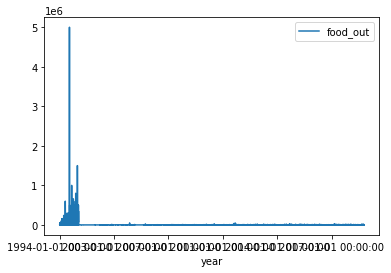

In [132]:
df_new2.plot.line(x = 'year', y = 'food_out')
plt.show()

In [143]:
df_new2['food_out']=df_new2['food_out'].replace('5000000', 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_new2['food_out'].max()

5000000

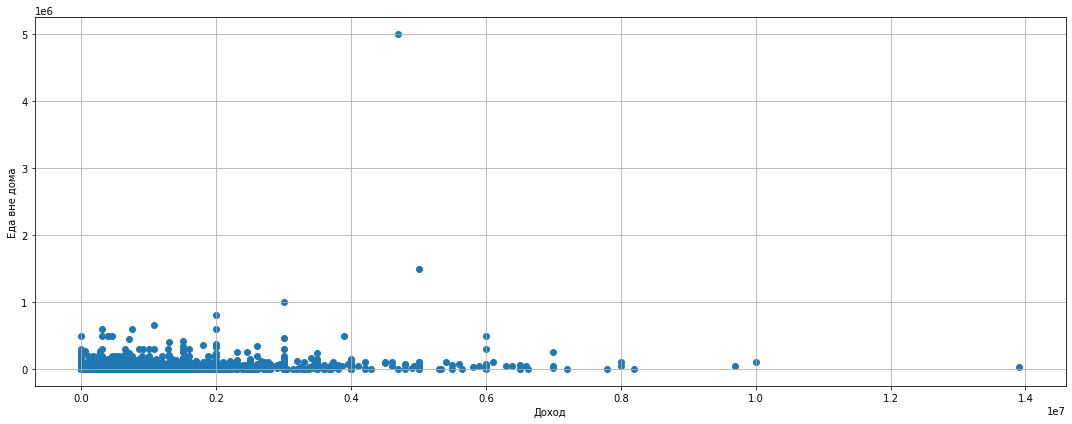

In [149]:
plt.figure(figsize=(15, 6))
plt.scatter(df_new2.income, df_new2.food_out)
plt.xlabel('Доход')
plt.ylabel('Еда вне дома')
plt.grid(b=1)
plt.tight_layout()
plt.show()

In [155]:
df_new2['logfood']=np.log(df_new2['food_out'].astype('float64'))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
df_new2

,year,id,food_out,income,logfood
0,1994-01-01,1001.0,7500,62000,8.922658
1,1994-01-01,1002.0,9500,300000,9.159047
2,1994-01-01,1003.0,5000,140000,8.517193
5,1994-01-01,1006.0,20000,250000,9.903488
6,1994-01-01,1007.0,6000,3600000,8.699515
...,...,...,...,...,...
138339,2019-01-01,14215145.0,500,60000,6.214608
138343,2019-01-01,14215196.0,0,90000,-inf
138345,2019-01-01,14215353.0,4000,135000,8.294050
138356,2019-01-01,14290004.0,1000,145000,6.907755


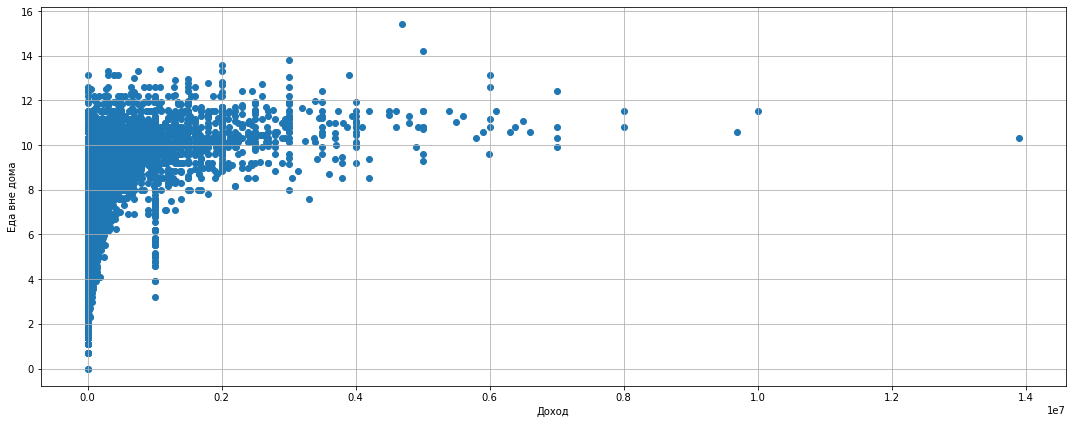

In [157]:
plt.figure(figsize=(15, 6))
plt.scatter(df_new2.income, df_new2.logfood)
plt.xlabel('Доход')
plt.ylabel('Еда вне дома')
plt.grid(b=1)
plt.tight_layout()
plt.show()

In [158]:
df_new2['loginc']=np.log(df_new2['income'].astype('float64'))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df_new2

,year,id,food_out,income,logfood,loginc
0,1994-01-01,1001.0,7500,62000,8.922658,11.034890
1,1994-01-01,1002.0,9500,300000,9.159047,12.611538
2,1994-01-01,1003.0,5000,140000,8.517193,11.849398
5,1994-01-01,1006.0,20000,250000,9.903488,12.429216
6,1994-01-01,1007.0,6000,3600000,8.699515,15.096444
...,...,...,...,...,...,...
138339,2019-01-01,14215145.0,500,60000,6.214608,11.002100
138343,2019-01-01,14215196.0,0,90000,-inf,11.407565
138345,2019-01-01,14215353.0,4000,135000,8.294050,11.813030
138356,2019-01-01,14290004.0,1000,145000,6.907755,11.884489


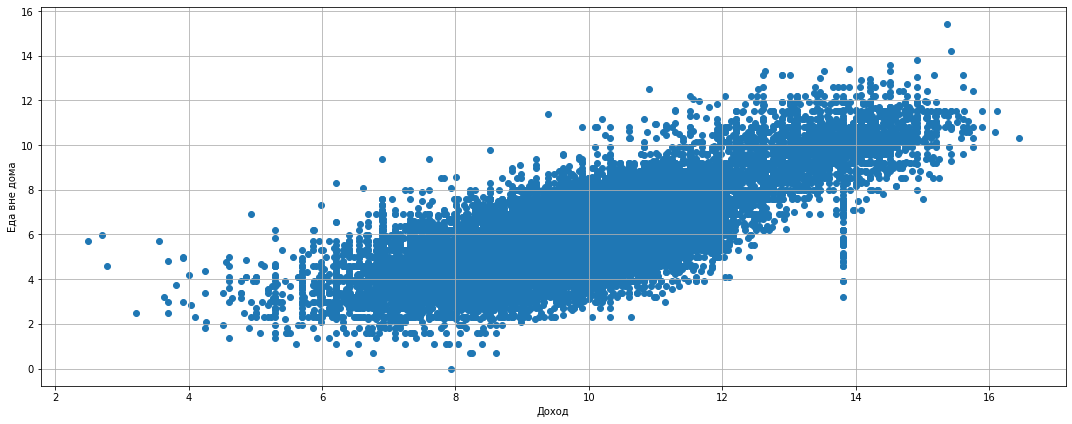

In [160]:
plt.figure(figsize=(15, 6))
plt.scatter(df_new2.loginc, df_new2.logfood)
plt.xlabel('Доход')
plt.ylabel('Еда вне дома')
plt.grid(b=1)
plt.tight_layout()
plt.show()

In [161]:
!pip install linearmodels

     |████████████████████████████████| 1.5MB 4.0MB/s 


In [162]:
from linearmodels.panel import PooledOLS, RandomEffects

In [163]:
import statsmodels.api as stat

In [173]:
year = pd.Categorical(df_new2.year)
df_new2 = df_new2.set_index(['id', 'year'])
df_new2['year'] = year

KeyError: ignored

In [166]:
exogv = ['loginc']
exog = stat.add_constant(df_new2[exogv])

## Сквозная модель

In [174]:
df_new2

,,food_out,income,logfood,loginc,year
id,year,,,,,
1001.0,1994-01-01 00:00:00,7500,62000,8.922658,11.034890,1994-01-01
1002.0,1994-01-01 00:00:00,9500,300000,9.159047,12.611538,1994-01-01
1003.0,1994-01-01 00:00:00,5000,140000,8.517193,11.849398,1994-01-01
1006.0,1994-01-01 00:00:00,20000,250000,9.903488,12.429216,1994-01-01
1007.0,1994-01-01 00:00:00,6000,3600000,8.699515,15.096444,1994-01-01
...,...,...,...,...,...,...
14215145.0,2019-01-01 00:00:00,500,60000,6.214608,11.002100,2019-01-01
14215196.0,2019-01-01 00:00:00,0,90000,-inf,11.407565,2019-01-01
14215353.0,2019-01-01 00:00:00,4000,135000,8.294050,11.813030,2019-01-01


In [179]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ["year", "id"]
exog = sm.add_constant(df_new2[exog_vars])
mod = PooledOLS(df_new2.logfood, exog)
pooled_res = mod.fit()
print(pooled_res)

KeyError: ignored

In [176]:
df_new2.year

id          year               
1001.0      1994-01-01 00:00:00   1994-01-01
1002.0      1994-01-01 00:00:00   1994-01-01
1003.0      1994-01-01 00:00:00   1994-01-01
1006.0      1994-01-01 00:00:00   1994-01-01
1007.0      1994-01-01 00:00:00   1994-01-01
                                     ...    
14215145.0  2019-01-01 00:00:00   2019-01-01
14215196.0  2019-01-01 00:00:00   2019-01-01
14215353.0  2019-01-01 00:00:00   2019-01-01
14290004.0  2019-01-01 00:00:00   2019-01-01
14290007.0  2019-01-01 00:00:00   2019-01-01
Name: year, Length: 55972, dtype: category
Categories (24, datetime64[ns]): [1994-01-01, 1995-01-01, 1996-01-01, 1998-01-01, ..., 2016-01-01,
                                  2017-01-01, 2018-01-01, 2019-01-01]